In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!unzip -uq "/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset2.zip" -d "/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/"

In [ ]:
# example of progressively loading images from file
from keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator(rescale=1. / 255)
img_height = 224
img_width = 224 
batch_size = 80
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset2',target_size=(img_height, img_width),batch_size = batch_size, subset='training')
#val_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset2',target_size=(img_height, img_width), batch_size = batch_size, subset='validation')

Found 400 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.applications import vgg19
# Init the VGG model
vgg_conv = vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(img_height, img_height, 3))

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fc60042f750> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc5f6d318d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc5f8d37310> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fc5f8ca8990> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc5f88275d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc5f8828750> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fc5f88308d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc5f883aa10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc5f883a2d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc5f88418d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc5f884c2d0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 

In [ ]:
from keras.models import Sequential, Model
#from tensorflow.keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Embedding, Dense, Dropout, Flatten, Input,GlobalAveragePooling2D
from keras import activations
#from tensorflow.python.keras.layers.core import Dense, Dropout, Flatten
#from tensorflow.python.keras.layers import Input
from keras.optimizers import Adam, SGD
from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications import vgg16
from skimage.color import gray2rgb
#from tensorflow.keras.applications.inception_v3 import InceptionV3 
#from tensorflow.keras.applications import DenseNet201

In [ ]:
# Create the model
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 45,725,770
Trainable params: 25,701,386
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
train_it.samples

10656

In [ ]:
import keras
#sgd = keras.optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['acc'])

In [ ]:
nb_epochs = 100
batch_size = 128
model.fit_generator(
    train_it,
    steps_per_epoch = train_it.samples // batch_size,
    validation_data = val_it, 
    validation_steps = val_it.samples // batch_size,
    epochs = nb_epochs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
2/2 [==============================] - 193s 117s/step - loss: 2.7409 - acc: 0.1024
Epoch 2/100
2/2 [==============================] - 39s 13s/step - loss: 2.4892 - acc: 0.1198
Epoch 3/100
2/2 [==============================] - 51s 25s/step - loss: 2.3417 - acc: 0.1875
Epoch 4/100
2/2 [==============================] - 38s 13s/step - loss: 2.3479 - acc: 0.1710
Epoch 5/100
2/2 [==============================] - 38s 13s/step - loss: 2.3275 - acc: 0.1615
Epoch 6/100
2/2 [==============================] - 38s 13s/step - loss: 2.1351 - acc: 0.2300
Epoch 7/100
2/2 [==============================] - 51s 25s/step - loss: 2.1619 - acc: 0.2344
Epoch 8/100
2/2 [==============================] - 38s 13s/step - loss: 2.1253 - acc: 0.2422
Epoch 9/100
2/2 [==============================] - 51s 25s/step - loss: 1.9921 - acc: 0.2812
Epoch 10/100
2/2 [==============================] - 38s 26s/step - loss: 1.9537 - acc: 0.3785
Epoch 11/100
2/2 [==============================] - 38s 26s/step - 

In [ ]:
model.save("/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/Dataset_2_VGG19")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/Dataset_1_VGG19/assets


In [ ]:
val_it.classes

array([ 0,  0,  0, ..., 36, 36, 36], dtype=int32)

In [ ]:
val_it.classes

array([ 0,  0,  0, ..., 36, 36, 36], dtype=int32)

In [ ]:
test_score = model.evaluate_generator(val_it, batch_size)



print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 98.75%
[INFO] Loss:  0.5093265771865845


In [ ]:
import sys

import numpy as np

from keras import backend as K

from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix

from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input

import matplotlib.pyplot as plt

from keras.optimizers import Adam

import itertools 

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False



def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [ ]:
#Print the Target names



target_names = []

for key in val_it.class_indices:

    target_names.append(key)



print(target_names)

['aa', 'bho', 'bishorgo', 'ga', 'la', 'po', 'rri', 'ta', 'th', 'tho']


In [ ]:
y_img_batch, y_class_batch = val_it[0]
y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)
print(sum(y_pred==y_true)/batch_size)

0.6171875


Normalized confusion matrix


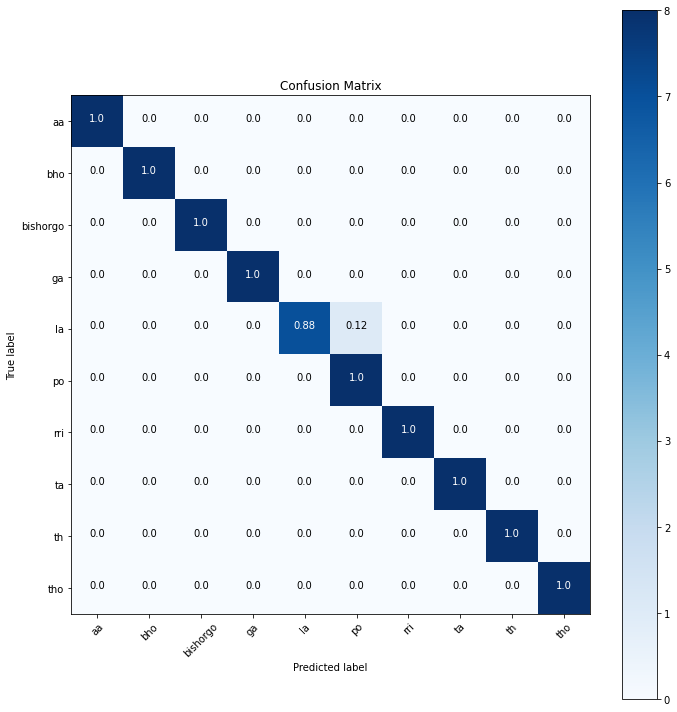

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_true,y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
#Print Classification Report

print('Classification Report')

print(classification_report(y_true, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      0.88      0.93         8
           5       0.89      1.00      0.94         8
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         8

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import keras
num_folds = 10
acc_per_fold = []
loss_per_fold = []
y_img_batch, y_class_batch = train_it[0]
verbosity = 1
from sklearn.model_selection import KFold
kfold = KFold(n_splits=num_folds, shuffle=True)
no_epochs = 100

In [ ]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(y_img_batch, y_class_batch):

  # Define the model architecture
  model = Sequential()

  # Add the vgg convolutional base model
  model.add(vgg_conv)

  # Add new layers
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  # Compile the model
  model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['acc'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(y_img_batch[train], y_class_batch[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)
  # Generate generalization metrics
  scores = model.evaluate(y_img_batch[test], y_class_batch[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 2.8117 - acc: 0.0556
Epoch 2/100
1/1 [==============================] - 0s 349ms/step - loss: 2.4158 - acc: 0.1806
Epoch 3/100
1/1 [==============================] - 0s 352ms/step - loss: 2.4298 - acc: 0.1528
Epoch 4/100
1/1 [==============================] - 0s 362ms/step - loss: 2.2941 - acc: 0.1944
Epoch 5/100
1/1 [==============================] - 0s 350ms/step - loss: 2.2609 - acc: 0.1944
Epoch 6/100
1/1 [==============================] - 0s 343ms/step - loss: 2.1562 - acc: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 368ms/step - loss: 2.2136 - acc: 0.2500
Epoch 8/100
1/1 [==============================] - 0s 352ms/step - loss: 2.1680 - acc: 0.2083
Epoch 9/100
1/1 [==============================] - 0s 357ms/step - loss: 2.0997 - acc: 0.2222
Epoch 10/100
1/1 [==============================] - 0s 366ms

In [ ]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.8456449508666992 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 2 - Loss: 1.1185274124145508 - Accuracy: 87.5%
------------------------------------------------------------------------
> Fold 3 - Loss: 1.2455260753631592 - Accuracy: 87.5%
------------------------------------------------------------------------
> Fold 4 - Loss: 1.344441294670105 - Accuracy: 87.5%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.99296635389328 - Accuracy: 75.0%
------------------------------------------------------------------------
> Fold 6 - Loss: 1.2742938995361328 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 7 - Loss: 1.046918511390686 - Accuracy: 87.5%
-------------------------